In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#% matplotlib notebook
import math
import atradlib as ar
import pandas as pd
ff = 15

# Frequenzen bestimmen
-------------------------------------
Folgende Bänder werden benutzt:
1. C - band, benutzt vom DWD
2. X - Band, benutzt von Uni Bonn BoXPol/JuXPol
3. K - Band, benutzt von Uni Bonn MRR
4. Ku - Band, benutzt von GPM Ku-DPR
5. Ka - Band, benutzt von GPM Ka-DPR
6. S - Band, keine Daten vorhanden

In [3]:
# Aus AtRadLib eingelesen und in Wellenlänge [µm] umrechnen
wavel_c_band = ar.freq2wav(ar.freq_c_band*1e9)*1e2
wavel_x_band = ar.freq2wav(ar.freq_x_band*1e9)*1e2
wavel_s_band = ar.freq2wav(ar.freq_s_band*1e9)*1e2
wavel_k_band = ar.freq2wav(ar.freq_k_band*1e9)*1e2
wavel_ka_band = ar.freq2wav(ar.freq_ka_band*1e9)*1e2
wavel_ku_band = ar.freq2wav(ar.freq_ku_band*1e9)*1e2

d = {'frequenz [GHz]':[ar.freq_s_band,ar.freq_c_band,ar.freq_x_band,ar.freq_k_band,ar.freq_ku_band,ar.freq_ka_band],
     'wavelength [cm]':[wavel_s_band,wavel_c_band,wavel_x_band,wavel_k_band,wavel_ku_band,
                   wavel_ka_band],
             'band':['S_band','C_band','X_band','K_band','Ku_band','Ka_band'],}

pd.DataFrame(data=d)

,band,frequenz [GHz],wavelength [cm]
0,S_band,3.0,9.993333
1,C_band,5.6,5.353571
2,X_band,9.3,3.223656
3,K_band,24.1,1.243983
4,Ku_band,13.6,2.204412
5,Ka_band,35.5,0.844507


# Bestimmung der Umgebungsparameter
---------------------------------------------------------

In [4]:
# Typische Tropfengrößen laut GP S.346
# Drizzle

#r_drops = np.arange(0.01, 200., 0.001) in [µm]
# in cm
r_drops = np.arange(0.00001, 5., 0.0001)

# Berechnung des Mie Coeff
X_c_band = ar.size_para(r_drops, wavel_c_band)
X_x_band = ar.size_para(r_drops, wavel_x_band)
X_s_band = ar.size_para(r_drops, wavel_s_band)
X_k_band = ar.size_para(r_drops, wavel_k_band)
X_ku_band = ar.size_para(r_drops, wavel_ku_band)
X_ka_band = ar.size_para(r_drops, wavel_ka_band)

# Brechungs Index
m_ice = 1.31-0.j
m_water = 1.33-0.j 

(0, 0.3)

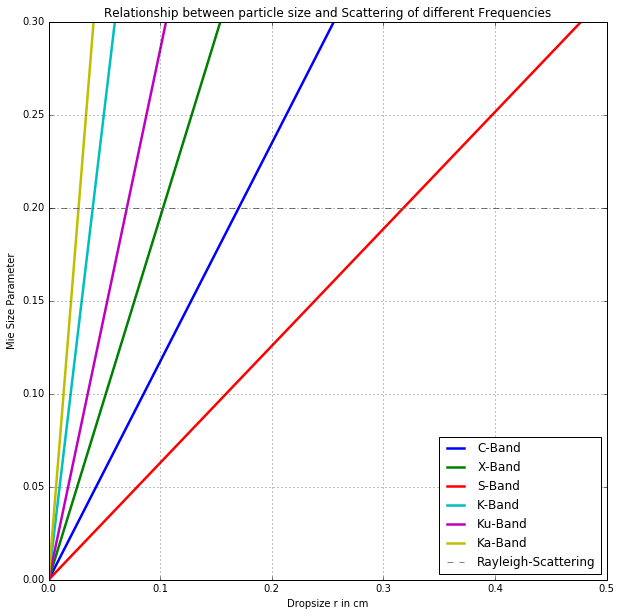

In [5]:
plt.figure(figsize=(10,10))
plt.plot(r_drops,X_c_band, label='C-Band', lw=2.5)
plt.plot(r_drops,X_x_band, label='X-Band', lw=2.5)
plt.plot(r_drops,X_s_band, label='S-Band', lw=2.5)
plt.plot(r_drops,X_k_band, label='K-Band', lw=2.5)
plt.plot(r_drops,X_ku_band, label='Ku-Band', lw=2.5)
plt.plot(r_drops,X_ka_band, label='Ka-Band', lw=2.5)

plt.title('Relationship between particle size and Scattering of different Frequencies')
plt.xlabel('Dropsize r in cm')
plt.ylabel('Mie Size Parameter')
plt.axhline(0.2, label='Rayleigh-Scattering', color='grey',linestyle='--')
#plt.axhline(2000, label='Geometric-Optics-Scattering', color='grey',linestyle='-.')
plt.grid()
plt.legend(loc='lower right')
plt.xlim(0,0.5)
plt.ylim(0,0.3)

# Scattering by Spheres - Mie Theory
---------------------------------

$$Q_e = \frac{2}{\chi^2} \sum_{n=1}^\infty (2n+1) \Re(a_n + b_n)$$  (GP 12.23)
$$Q_e = \frac{2}{\chi^2} \sum_{n=1}^\infty (2n+1) (|a_n|^2 + |b_n|^2)$$  (GP. 12.24)

In [6]:
Qe_s_band = np.zeros(len(r_drops), dtype='complex')
Qe_c_band = np.zeros(len(r_drops), dtype='complex')
Qe_x_band = np.zeros(len(r_drops), dtype='complex')
Qe_k_band = np.zeros(len(r_drops), dtype='complex')
Qe_ka_band = np.zeros(len(r_drops), dtype='complex')
Qe_ku_band = np.zeros(len(r_drops), dtype='complex')

for i in range(len(r_drops)):
    Qe_c_band[i] = ar.efficiencies(m_water, X_c_band[i])[1]
    Qe_s_band[i] = ar.efficiencies(m_water, X_s_band[i])[1]
    Qe_x_band[i] = ar.efficiencies(m_water, X_x_band[i])[1]
    Qe_k_band[i] = ar.efficiencies(m_water, X_k_band[i])[1]
    Qe_ka_band[i] = ar.efficiencies(m_water, X_ka_band[i])[1]
    Qe_ku_band[i] = ar.efficiencies(m_water, X_ku_band[i])[1]


/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


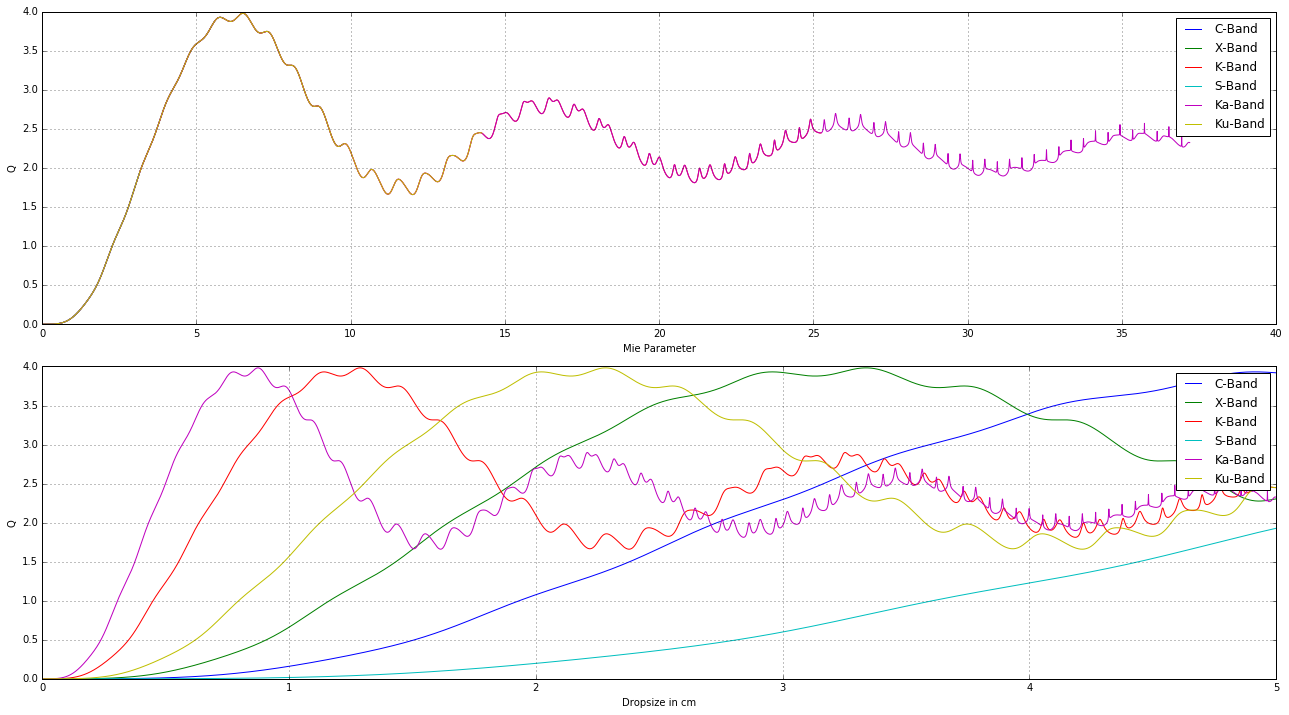

In [7]:
plt.figure(figsize=(18,10))
plt.subplot(2,1,1)
plt.plot(X_c_band,Qe_c_band, label='C-Band')
plt.plot(X_x_band,Qe_x_band, label='X-Band')
plt.plot(X_k_band,Qe_k_band, label='K-Band')
plt.plot(X_s_band,Qe_s_band, label='S-Band')
plt.plot(X_ka_band,Qe_ka_band, label='Ka-Band')
plt.plot(X_ku_band,Qe_ku_band, label='Ku-Band')
#plt.xlim(0,5.041)
plt.ylabel('Q')
plt.xlabel('Mie Parameter')
plt.legend(loc='upper right')
plt.grid()

plt.subplot(2,1,2)
plt.plot(r_drops,Qe_c_band, label='C-Band')
plt.plot(r_drops,Qe_x_band, label='X-Band')
plt.plot(r_drops,Qe_k_band, label='K-Band')
plt.plot(r_drops,Qe_s_band, label='S-Band')
plt.plot(r_drops,Qe_ka_band, label='Ka-Band')
plt.plot(r_drops,Qe_ku_band, label='Ku-Band')
#plt.xlim(0,15.041)
plt.xlabel('Dropsize in cm')
plt.ylabel('Q')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()




# Comparison Qext calculated by Rayleigh and Mie 
-------------------------


$$Q_e = 4 \chi  \Im\{\frac{m^2 -1}{m^2 + 2}[ 1 +\frac{\chi^2}{15} (\frac{m^2 -1}{m^2 + 2})(\frac{m^4 +27m^2+38}{2m^2 +3})]\}$$ (GP 12.12)

$$Q_s = \frac{8}{3}\chi^4 |\frac{m^2 -1}{m^2 + 2}|^2$$ (GP 12.13)

$$Q_a = 4 \chi \Im\{ \frac{m^2 -1}{m^2 + 2}\}$$ (GP 12.14)

In [8]:
from atradlib import ray_efficiencies

rQe_s_band = np.zeros(len(r_drops), dtype='complex')
rQe_c_band = np.zeros(len(r_drops), dtype='complex')
rQe_x_band = np.zeros(len(r_drops), dtype='complex')
rQe_k_band = np.zeros(len(r_drops), dtype='complex')
rQe_ka_band = np.zeros(len(r_drops), dtype='complex')
rQe_ku_band = np.zeros(len(r_drops), dtype='complex')

for i in range(len(r_drops)):
    rQe_c_band[i] = ray_efficiencies(m_water, X_c_band[i])[1]
    rQe_s_band[i] = ray_efficiencies(m_water, X_s_band[i])[1]
    rQe_x_band[i] = ray_efficiencies(m_water, X_x_band[i])[1]
    rQe_k_band[i] = ray_efficiencies(m_water, X_k_band[i])[1]
    rQe_ka_band[i] = ray_efficiencies(m_water, X_ka_band[i])[1]
    rQe_ku_band[i] = ray_efficiencies(m_water, X_ku_band[i])[1]


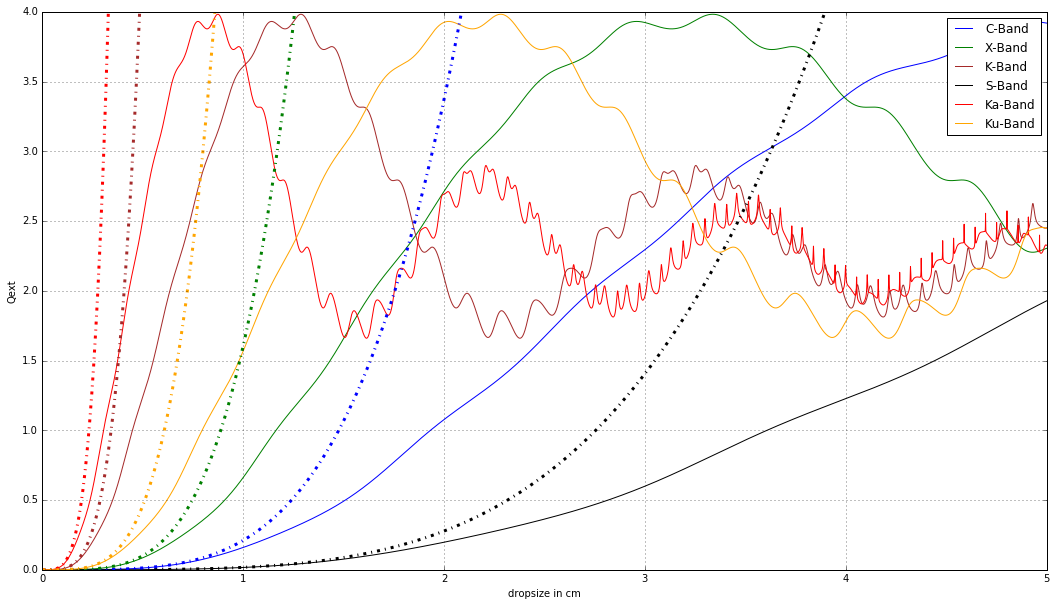

In [9]:
plt.figure(figsize=(18,10))
plt.plot(r_drops, Qe_c_band, label='C-Band', color='blue')
plt.plot(r_drops, Qe_x_band, label='X-Band', color='green')
plt.plot(r_drops, Qe_k_band, label='K-Band', color='brown')
plt.plot(r_drops, Qe_s_band, label='S-Band', color='black')
plt.plot(r_drops, Qe_ka_band, label='Ka-Band', color='red')
plt.plot(r_drops, Qe_ku_band, label='Ku-Band', color='orange')
#plt.xlim(0,1.)
#plt.ylim(0,0.00005)
plt.grid()
plt.ylabel('Qext')

#plt.axvline((0.2/(2*np.pi))*wavel_s_band, label='S-Band Rayleigh', linestyle='--', color='black')
#plt.axvline((0.2/(2*np.pi))*wavel_c_band, label='C-Band Rayleigh', linestyle='--', color='blue')
#plt.axvline((0.2/(2*np.pi))*wavel_x_band, label='X-Band Rayleigh', linestyle='--', color='green')
#plt.axvline((0.2/(2*np.pi))*wavel_ka_band, label='Ka-Band Rayleigh', linestyle='--', color='red')
#plt.axvline((0.2/(2*np.pi))*wavel_k_band, label='K-Band Rayleigh', linestyle='--', color='brown')
#plt.axvline((0.2/(2*np.pi))*wavel_ku_band, label='Ku-Band Rayleigh', linestyle='--', color='orange')
plt.legend(loc='upper right')
plt.xlim(0,5)
plt.ylim(0,4)
plt.xlabel(r'dropsize in cm')


plt.plot(r_drops,rQe_s_band, label='S-Band', linestyle='-.', color='black',lw=3)
plt.plot(r_drops,rQe_c_band, label='C-Band', linestyle='-.', color='blue',lw=3)
plt.plot(r_drops,rQe_x_band, label='X-Band', linestyle='-.', color='green',lw=3)
plt.plot(r_drops,rQe_k_band, label='K-Band', linestyle='-.', color='brown',lw=3)
plt.plot(r_drops,rQe_ka_band, label='Ka-Band', linestyle='-.', color='red',lw=3)
plt.plot(r_drops,rQe_ku_band, label='Ku-Band', linestyle='-.', color='orange',lw=3)

# Berechnung der Scattering cross-section
-----------------------------------------------------------------

$$Q_{e,s,a} = \frac{\sigma_{e,s,a}}{A}$$ (GP 7.22)

In [10]:
sigma_c_band = Qe_c_band * np.pi*r_drops**2
sigma_s_band = Qe_s_band * np.pi*r_drops**2
sigma_x_band = Qe_x_band * np.pi*r_drops**2
sigma_k_band = Qe_k_band * np.pi*r_drops**2
sigma_ka_band = Qe_ka_band * np.pi*r_drops**2
sigma_ku_band = Qe_ku_band * np.pi*r_drops**2

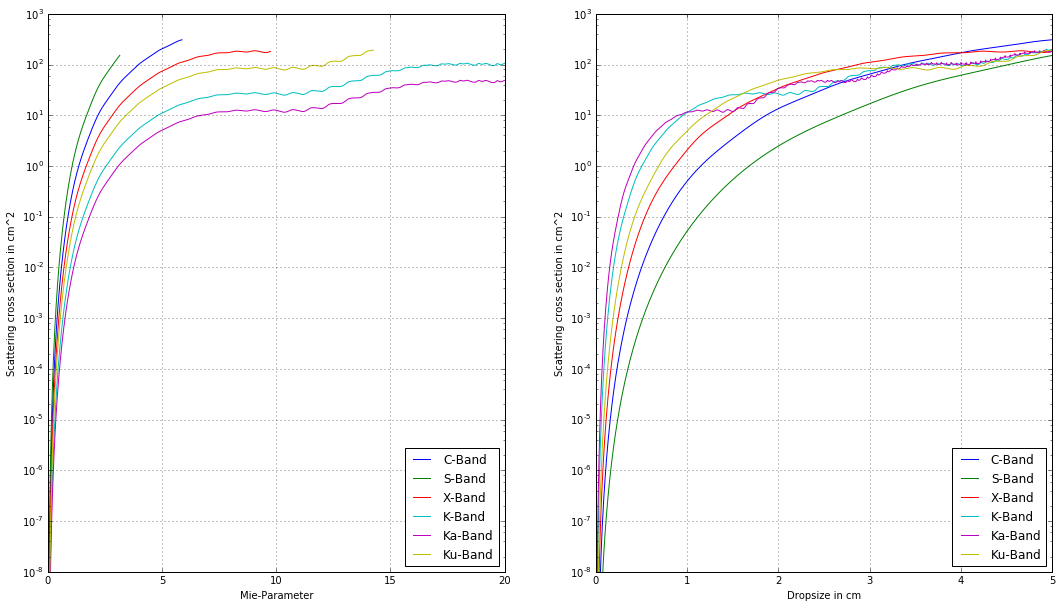

In [11]:
plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
plt.semilogy(X_c_band, sigma_c_band, label='C-Band')
plt.semilogy(X_s_band, sigma_s_band, label='S-Band')
plt.semilogy(X_x_band, sigma_x_band, label='X-Band')
plt.semilogy(X_k_band, sigma_k_band, label='K-Band')
plt.semilogy(X_ka_band, sigma_ka_band, label='Ka-Band')
plt.semilogy(X_ku_band, sigma_ku_band, label='Ku-Band')
plt.xlim(0,20)
plt.ylim(1e-8,1e3)
plt.xlabel('Mie-Parameter')
plt.ylabel('Scattering cross section in cm^2')
plt.grid()
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.semilogy(r_drops, sigma_c_band, label='C-Band')
plt.semilogy(r_drops, sigma_s_band, label='S-Band')
plt.semilogy(r_drops, sigma_x_band, label='X-Band')
plt.semilogy(r_drops, sigma_k_band, label='K-Band')
plt.semilogy(r_drops, sigma_ka_band, label='Ka-Band')
plt.semilogy(r_drops, sigma_ku_band, label='Ku-Band')
#plt.xlim(0,20)
plt.ylim(1e-8,1e3)
plt.grid()
plt.xlabel('Dropsize in cm')
plt.ylabel('Scattering cross section in cm^2')
plt.legend(loc='lower right')

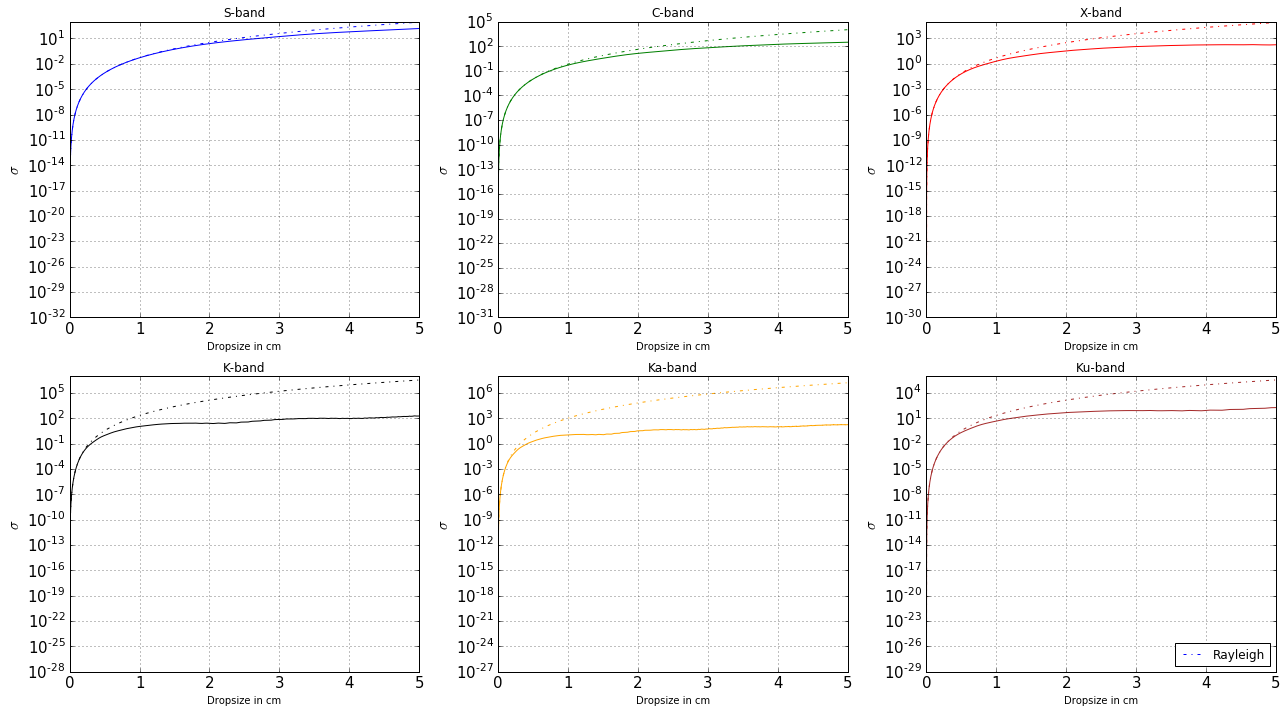

In [15]:
#!!!!!!!!!!!!! EINHEITEN!!!!!!!!!!!!!!!!!!!!!!!
#% matplotlib notebook
plt.figure(figsize=(18,10))

plt.subplot(2,3,1)
plt.semilogy(r_drops, rQe_s_band * np.pi*r_drops**2, color='blue', linestyle='-.')
plt.semilogy(r_drops,sigma_s_band, color='blue')
plt.grid()
plt.xlabel('Dropsize in cm')
plt.ylabel(r'$\sigma$', fontsize=15)

plt.title('S-band')
plt.xticks(fontsize=ff)
plt.yticks(fontsize=ff)


plt.subplot(2,3,2)
plt.semilogy(r_drops, rQe_c_band * np.pi*r_drops**2, color='green', linestyle='-.')
plt.semilogy(r_drops,sigma_c_band, color='green')
plt.grid()
plt.xlabel('Dropsize in cm')
plt.ylabel(r'$\sigma$', fontsize=15)
plt.title('C-band')
plt.xticks(fontsize=ff)
plt.yticks(fontsize=ff)


plt.subplot(2,3,3)
plt.semilogy(r_drops, rQe_x_band * np.pi*r_drops**2, color='red', linestyle='-.')
plt.semilogy(r_drops,sigma_x_band, color='red')
plt.grid()
plt.xlabel('Dropsize in cm')
plt.ylabel(r'$\sigma$', fontsize=15)
plt.title('X-band')
plt.xticks(fontsize=ff)
plt.yticks(fontsize=ff)


plt.subplot(2,3,4)
plt.semilogy(r_drops, rQe_k_band * np.pi*r_drops**2, color='black', linestyle='-.')
plt.semilogy(r_drops,sigma_k_band, color='black')
plt.grid()
plt.xlabel('Dropsize in cm')
plt.ylabel(r'$\sigma$', fontsize=15)
plt.title('K-band')
plt.xticks(fontsize=ff)
plt.yticks(fontsize=ff)


plt.subplot(2,3,5)
plt.semilogy(r_drops, rQe_ka_band * np.pi*r_drops**2, color='orange', linestyle='-.')
plt.semilogy(r_drops,sigma_ka_band, color='orange')
plt.grid()
plt.xlabel('Dropsize in cm')
plt.ylabel(r'$\sigma$', fontsize=15)
plt.title('Ka-band')
plt.xticks(fontsize=ff)
plt.yticks(fontsize=ff)


plt.subplot(2,3,6)
plt.semilogy(r_drops, rQe_ku_band * np.pi*r_drops**2, color='brown', linestyle='-.')
plt.semilogy(r_drops,sigma_ku_band, color='brown')

plt.grid()
plt.xlabel('Dropsize in cm')
plt.ylabel(r'$\sigma$', fontsize=15)
plt.title('Ku-band')
plt.plot(np.nan, np.nan,linestyle='-.', label='Rayleigh')
plt.plot(np.nan, np.nan,linestyle='-')
plt.legend(loc='lower right')
plt.xticks(fontsize=ff)
plt.yticks(fontsize=ff)

plt.tight_layout()
plt.show()

### Rayleigh approximation
-----------------------


In [13]:
def backscattercrosssection_ray(m,D,wav):
    """
    Calculating the backscattering cross section with rayleigh approximation
    
    Input:
        Kappa: dielectric konstant
        m : refrection index
        D : diameter
        wav : wavelangth
    Output: 
        sigma_b : backscattering crossection
        
    """
    Kappa = np.abs((m**2. - 1.)/(m**2. + 2))
    sigma_b = (np.pi**5./wav**4.) * Kappa**2 * D**6.
    #sigma_b = np.pi * Kappa**2 * D**2 * chi**4
    return sigma_b

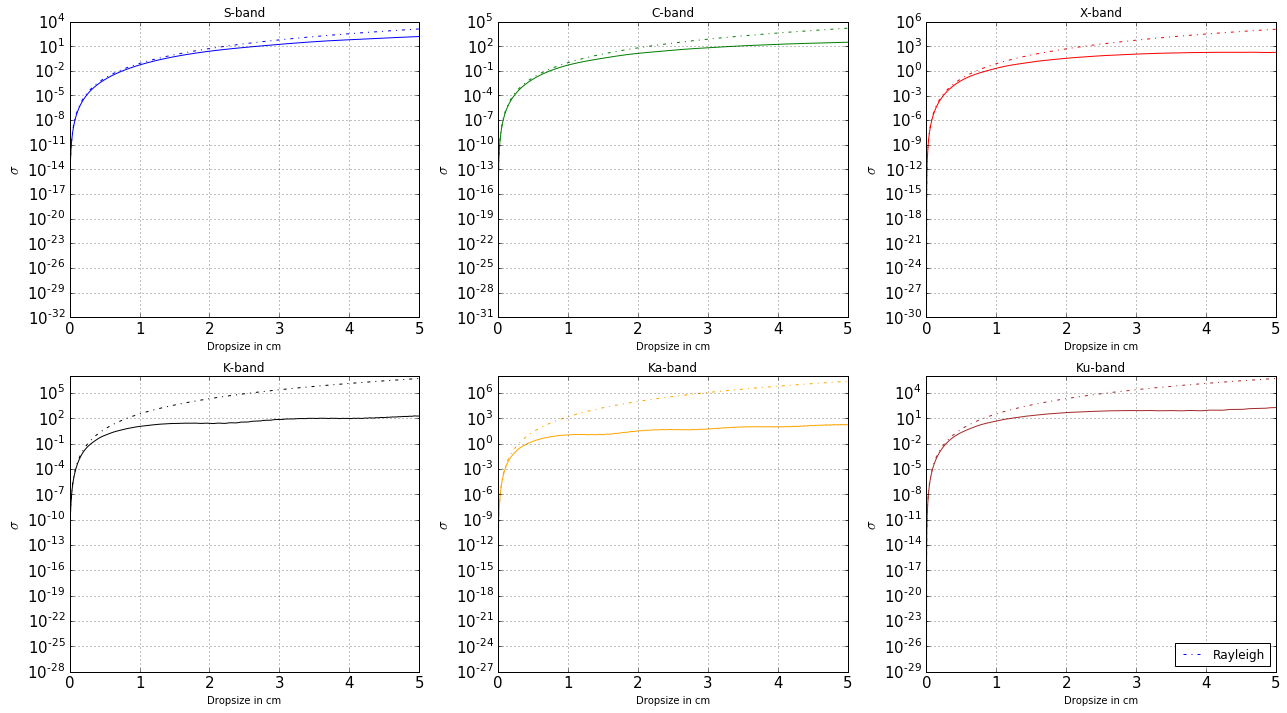

In [16]:
#!!!!!!!!!!!!! EINHEITEN!!!!!!!!!!!!!!!!!!!!!!!
#% matplotlib notebook
plt.figure(figsize=(18,10))

plt.subplot(2,3,1)
plt.semilogy(r_drops, backscattercrosssection_ray(m_water,2*r_drops,wavel_s_band), color='blue', linestyle='-.')
plt.semilogy(r_drops,sigma_s_band, color='blue')
plt.grid()
plt.xlabel('Dropsize in cm')
plt.ylabel(r'$\sigma$', fontsize=15)

plt.title('S-band')
plt.xticks(fontsize=ff)
plt.yticks(fontsize=ff)


plt.subplot(2,3,2)
plt.semilogy(r_drops,backscattercrosssection_ray(m_water,2*r_drops,wavel_c_band), color='green', linestyle='-.')
plt.semilogy(r_drops,sigma_c_band, color='green')
plt.grid()
plt.xlabel('Dropsize in cm')
plt.ylabel(r'$\sigma$', fontsize=15)
plt.title('C-band')
plt.xticks(fontsize=ff)
plt.yticks(fontsize=ff)


plt.subplot(2,3,3)
plt.semilogy(r_drops,backscattercrosssection_ray(m_water,2*r_drops,wavel_x_band), color='red', linestyle='-.')
plt.semilogy(r_drops,sigma_x_band, color='red')
plt.grid()
plt.xlabel('Dropsize in cm')
plt.ylabel(r'$\sigma$', fontsize=15)
plt.title('X-band')
plt.xticks(fontsize=ff)
plt.yticks(fontsize=ff)


plt.subplot(2,3,4)
plt.semilogy(r_drops,backscattercrosssection_ray(m_water,2*r_drops,wavel_k_band), color='black', linestyle='-.')
plt.semilogy(r_drops,sigma_k_band, color='black')
plt.grid()
plt.xlabel('Dropsize in cm')
plt.ylabel(r'$\sigma$', fontsize=15)
plt.title('K-band')
plt.xticks(fontsize=ff)
plt.yticks(fontsize=ff)


plt.subplot(2,3,5)
plt.semilogy(r_drops,backscattercrosssection_ray(m_water,2*r_drops,wavel_ka_band), color='orange', linestyle='-.')
plt.semilogy(r_drops,sigma_ka_band, color='orange')
plt.grid()
plt.xlabel('Dropsize in cm')
plt.ylabel(r'$\sigma$', fontsize=15)
plt.title('Ka-band')
plt.xticks(fontsize=ff)
plt.yticks(fontsize=ff)


plt.subplot(2,3,6)
plt.semilogy(r_drops,backscattercrosssection_ray(m_water,2*r_drops,wavel_ku_band), color='brown', linestyle='-.')
plt.semilogy(r_drops,sigma_ku_band, color='brown')

plt.grid()
plt.xlabel('Dropsize in cm')
plt.ylabel(r'$\sigma$', fontsize=15)
plt.title('Ku-band')
plt.plot(np.nan, np.nan,linestyle='-.', label='Rayleigh')
plt.plot(np.nan, np.nan,linestyle='-')
plt.legend(loc='lower right')
plt.xticks(fontsize=ff)
plt.yticks(fontsize=ff)

plt.tight_layout()
plt.show()

# Calculating Backscattering cross section for Mie 
---------------------------------------------
$$\sigma_b = \sigma_{s} p(\Theta) |\Theta=\pi$$

##### Typische Werte $\sigma = 1m^2$  

In [17]:
ang_back = np.array([180])
nang = 1

P_theta_s = np.zeros(len(X_s_band), dtype=complex) 
P_theta_c = np.zeros(len(X_c_band), dtype=complex) 
P_theta_x = np.zeros(len(X_x_band), dtype=complex) 
P_theta_k = np.zeros(len(X_k_band), dtype=complex) 
P_theta_ku = np.zeros(len(X_ku_band), dtype=complex) 
P_theta_ka = np.zeros(len(X_ka_band), dtype=complex) 

print ang_back, m_water, X_c_band

for k in range(len(X_x_band)):
    P_theta_s[k] = ar.phase_func(m_water, X_s_band[k], ang_back,nang)
    P_theta_c[k] = ar.phase_func(m_water, X_c_band[k], ang_back,nang)
    P_theta_x[k] = ar.phase_func(m_water, X_x_band[k], ang_back,nang)
    P_theta_k[k] = ar.phase_func(m_water, X_k_band[k], ang_back,nang)
    P_theta_ku[k] = ar.phase_func(m_water, X_ku_band[k], ang_back,nang)
    P_theta_ka[k] = ar.phase_func(m_water, X_ka_band[k], ang_back,nang)
    

    

[180] (1.33+0j) [1.17364369e-05 1.29100806e-04 2.46465174e-04 ... 5.86787808e+00
 5.86799544e+00 5.86811280e+00]


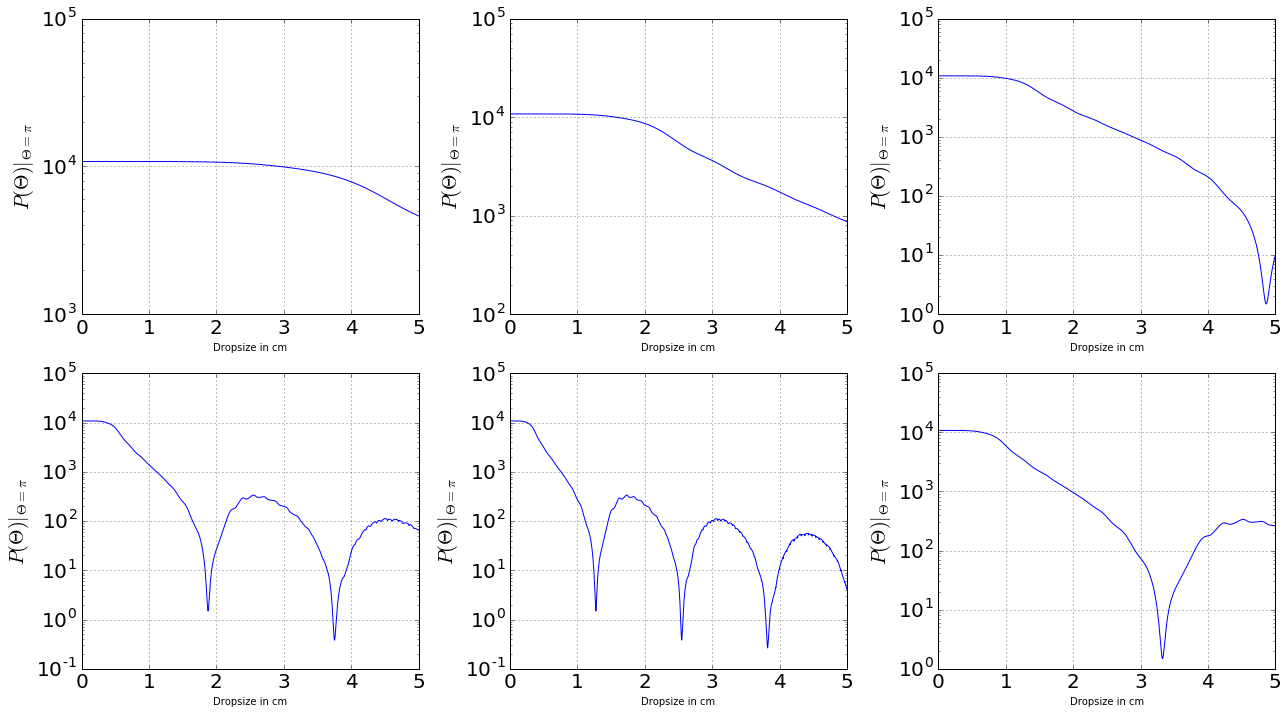

In [24]:
plt.figure(figsize=(18,10))

plt.subplot(2,3,1)
plt.semilogy(r_drops, P_theta_s)

plt.grid()
plt.xlabel('Dropsize in cm')
plt.ylabel(r'$P(\Theta) |_{\Theta = \pi}$', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(2,3,2)
plt.semilogy(r_drops, P_theta_c)

plt.grid()
plt.xlabel('Dropsize in cm')
plt.ylabel(r'$P(\Theta) |_{\Theta = \pi}$', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(2,3,3)
plt.semilogy(r_drops, P_theta_x)

plt.grid()
plt.xlabel('Dropsize in cm')
plt.ylabel(r'$P(\Theta) |_{\Theta = \pi}$', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(2,3,4)
plt.semilogy(r_drops, P_theta_k)

plt.grid()
plt.xlabel('Dropsize in cm')
plt.ylabel(r'$P(\Theta) |_{\Theta = \pi}$', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(2,3,5)
plt.semilogy(r_drops, P_theta_ka)

plt.grid()
plt.xlabel('Dropsize in cm')
plt.ylabel(r'$P(\Theta) |_{\Theta = \pi}$', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(2,3,6)
plt.semilogy(r_drops, P_theta_ku)

plt.grid()
plt.xlabel('Dropsize in cm')
plt.ylabel(r'$P(\Theta) |_{\Theta = \pi}$', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tight_layout()
plt.show()

# Calculating Backscattering cross section for Rayleigh 
---------------------------------------------


$$p(\Theta)=\frac{3}{4}(1-cos^2 \Theta)$$



In [25]:
rP_theta_s = np.zeros(len(X_s_band), dtype=complex) 
rP_theta_c = np.zeros(len(X_c_band), dtype=complex) 
rP_theta_x = np.zeros(len(X_x_band), dtype=complex) 
rP_theta_k = np.zeros(len(X_k_band), dtype=complex) 
rP_theta_ku = np.zeros(len(X_ku_band), dtype=complex) 
rP_theta_ka = np.zeros(len(X_ka_band), dtype=complex) 

print ang_back, m_water, X_c_band

for k in range(len(X_x_band)):
    rP_theta_s[k] = ar.ray_phase_func(ang_back)
    rP_theta_c[k] = ar.ray_phase_func(ang_back)
    rP_theta_x[k] = ar.ray_phase_func(ang_back)
    rP_theta_k[k] = ar.ray_phase_func(ang_back)
    rP_theta_ku[k] = ar.ray_phase_func(ang_back)
    rP_theta_ka[k] = ar.ray_phase_func(ang_back)
    

    

[180] (1.33+0j) [1.17364369e-05 1.29100806e-04 2.46465174e-04 ... 5.86787808e+00
 5.86799544e+00 5.86811280e+00]


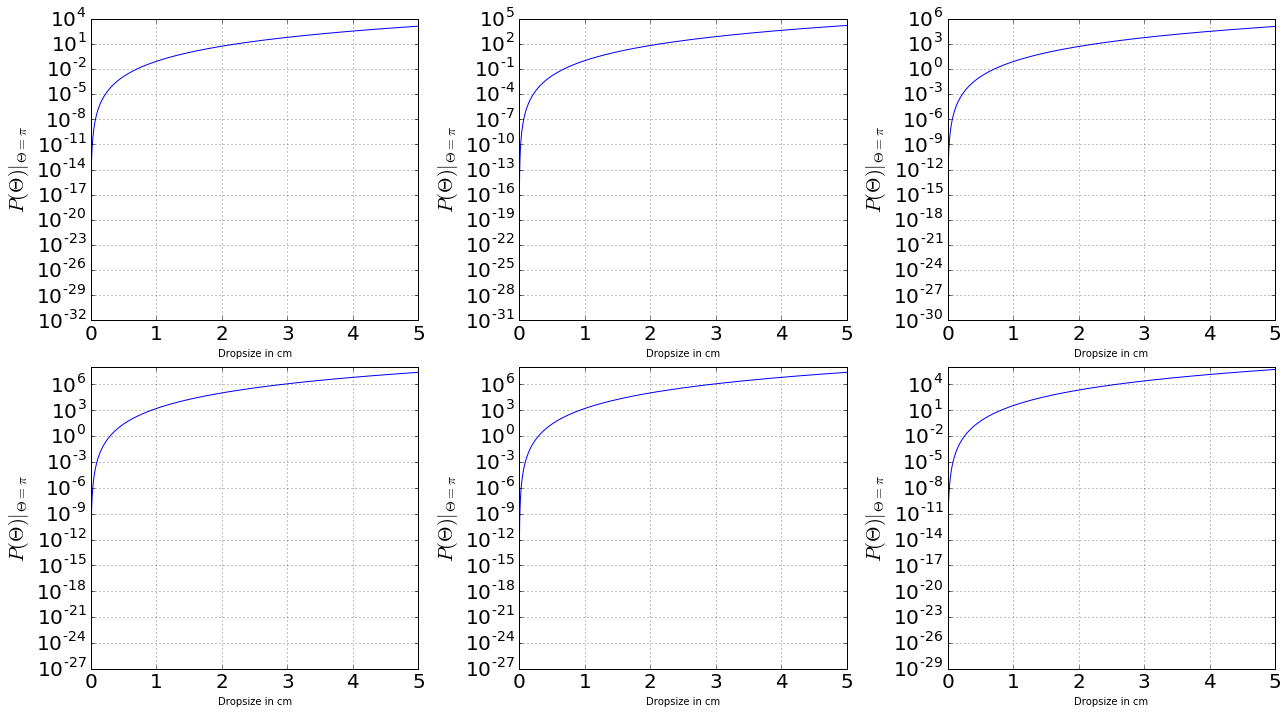

In [43]:
plt.figure(figsize=(18,10))

plt.subplot(2,3,1)
#plt.semilogy(r_drops, P_theta_s)
plt.semilogy(r_drops, rP_theta_s*rQe_s_band * np.pi*r_drops**2)

plt.grid()
plt.xlabel('Dropsize in cm')
plt.ylabel(r'$P(\Theta) |_{\Theta = \pi}$', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(2,3,2)
#plt.semilogy(r_drops, P_theta_c)
plt.semilogy(r_drops, rP_theta_c*rQe_c_band * np.pi*r_drops**2)

plt.grid()
plt.xlabel('Dropsize in cm')
plt.ylabel(r'$P(\Theta) |_{\Theta = \pi}$', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(2,3,3)
#plt.semilogy(r_drops, P_theta_x)
plt.semilogy(r_drops, rP_theta_x*rQe_x_band * np.pi*r_drops**2)

plt.grid()
plt.xlabel('Dropsize in cm')
plt.ylabel(r'$P(\Theta) |_{\Theta = \pi}$', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(2,3,4)
#plt.semilogy(r_drops, P_theta_k)
plt.semilogy(r_drops, rP_theta_ka*rQe_ka_band * np.pi*r_drops**2)

plt.grid()
plt.xlabel('Dropsize in cm')
plt.ylabel(r'$P(\Theta) |_{\Theta = \pi}$', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(2,3,5)
#plt.semilogy(r_drops, P_theta_ka)
plt.semilogy(r_drops, rP_theta_ka*rQe_ka_band * np.pi*r_drops**2)

plt.grid()
plt.xlabel('Dropsize in cm')
plt.ylabel(r'$P(\Theta) |_{\Theta = \pi}$', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(2,3,6)
#plt.semilogy(r_drops, P_theta_ku)
plt.semilogy(r_drops, rP_theta_ku*rQe_ku_band * np.pi*r_drops**2)

plt.grid()
plt.xlabel('Dropsize in cm')
plt.ylabel(r'$P(\Theta) |_{\Theta = \pi}$', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tight_layout()
plt.show()

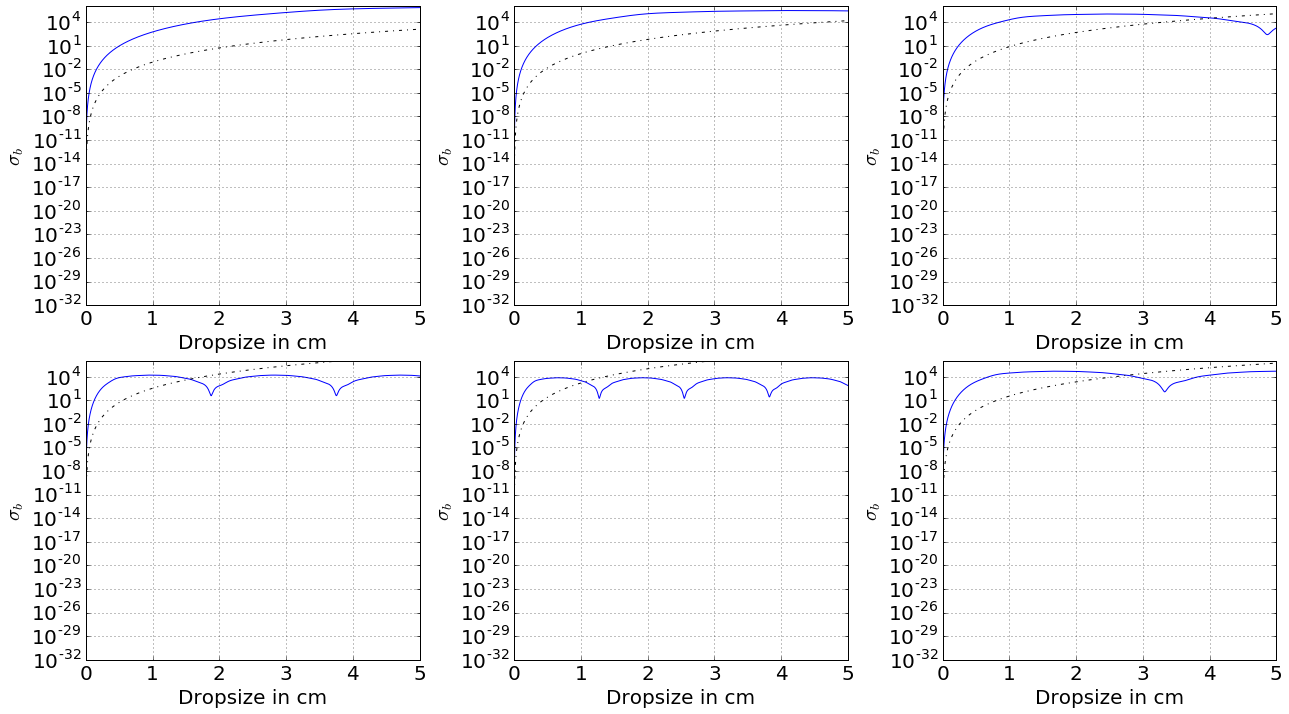

In [37]:
plt.figure(figsize=(18,10))

plt.subplot(2,3,1)
plt.semilogy(r_drops, P_theta_s * sigma_s_band)
plt.semilogy(r_drops,backscattercrosssection_ray(m_water,2*r_drops,wavel_s_band), color='black', linestyle='-.')
plt.xlabel('Dropsize in cm', fontsize=20)
plt.ylabel(r'$\sigma_b$', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.ylim(1e-32,1e6)

plt.subplot(2,3,2)
plt.semilogy(r_drops, P_theta_c * sigma_c_band)
plt.semilogy(r_drops,backscattercrosssection_ray(m_water,2*r_drops,wavel_c_band), color='black', linestyle='-.')
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Dropsize in cm', fontsize=20)
plt.ylabel(r'$\sigma_b$', fontsize=20)
plt.ylim(1e-32,1e6)


plt.subplot(2,3,3)
plt.semilogy(r_drops, P_theta_x * sigma_x_band)
plt.semilogy(r_drops,backscattercrosssection_ray(m_water,2*r_drops,wavel_x_band), color='black', linestyle='-.')
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Dropsize in cm', fontsize=20)
plt.ylabel(r'$\sigma_b$', fontsize=20)
plt.ylim(1e-32,1e6)


plt.subplot(2,3,4)
plt.semilogy(r_drops, P_theta_k * sigma_k_band)
plt.semilogy(r_drops,backscattercrosssection_ray(m_water,2*r_drops,wavel_k_band), color='black', linestyle='-.')
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Dropsize in cm', fontsize=20)
plt.ylabel(r'$\sigma_b$', fontsize=20)
plt.ylim(1e-32,1e6)


plt.subplot(2,3,5)
plt.semilogy(r_drops, P_theta_ka * sigma_ka_band)
plt.semilogy(r_drops,backscattercrosssection_ray(m_water,2*r_drops,wavel_ka_band), color='black', linestyle='-.')
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Dropsize in cm', fontsize=20)
plt.ylabel(r'$\sigma_b$', fontsize=20)
plt.ylim(1e-32,1e6)



plt.subplot(2,3,6)
plt.semilogy(r_drops, P_theta_ku * sigma_ku_band)
plt.semilogy(r_drops,backscattercrosssection_ray(m_water,2*r_drops,wavel_ku_band), color='black', linestyle='-.')
plt.xlabel('Dropsize in cm', fontsize=20)
plt.ylabel(r'$\sigma_b$', fontsize=20)
plt.ylim(1e-32,1e6)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()

plt.tight_layout()
plt.show()

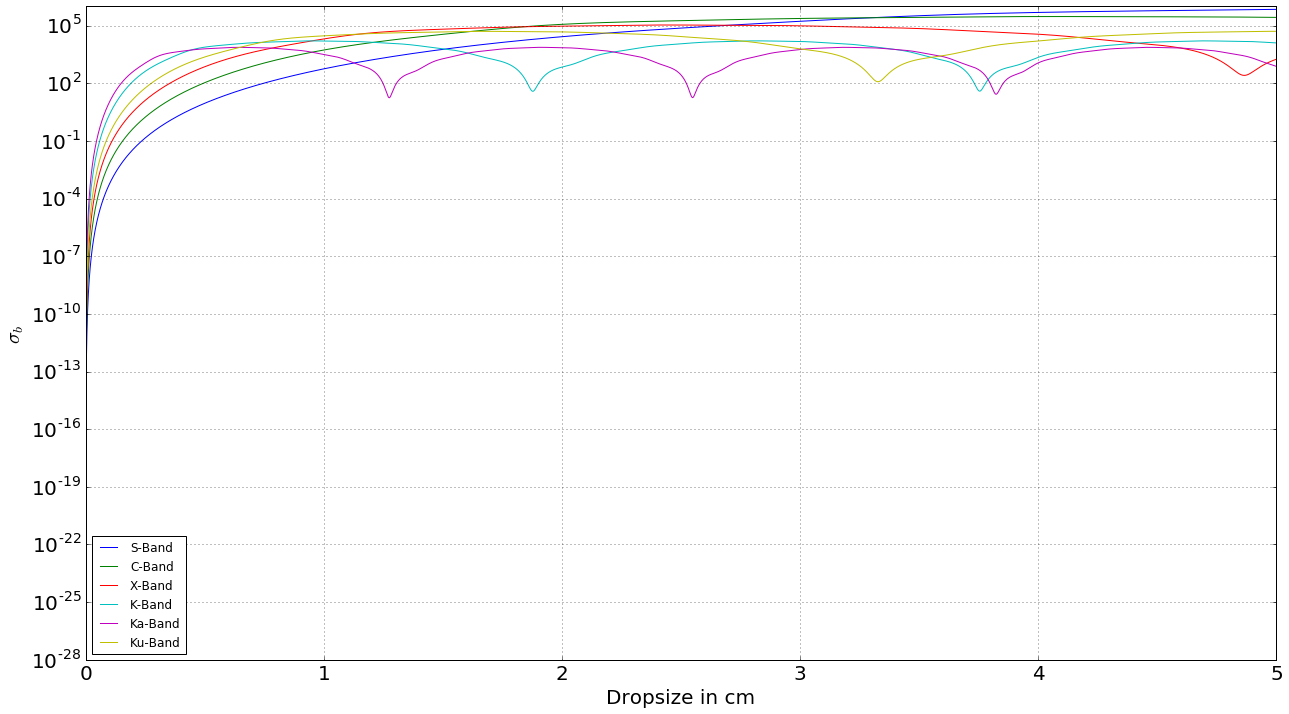

In [35]:
plt.figure(figsize=(18,10))

plt.semilogy(r_drops, P_theta_s * sigma_s_band, label='S-Band')


plt.semilogy(r_drops, P_theta_c * sigma_c_band, label='C-Band')


plt.semilogy(r_drops, P_theta_x * sigma_x_band, label='X-Band')


plt.semilogy(r_drops, P_theta_k * sigma_k_band, label='K-Band')


plt.semilogy(r_drops, P_theta_ka * sigma_ka_band, label='Ka-Band')


plt.semilogy(r_drops, P_theta_ku * sigma_ku_band, label='Ku-Band')

plt.xlabel('Dropsize in cm', fontsize = 20)
plt.ylabel(r'$\sigma_b$', fontsize = 20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

# Particle Size Distribution
----------------------------------
Normalized gamma distribution PSD [Ulbrich, 1983, Bringi et al 2002]

$$N(D) = N_w f(µ) (\frac{D}{D_0})^µ exp(-\Lambda D)$$


$$f(µ) = \frac{6}{3.67^4} \frac{(3.67+µ)^{µ+4}}{\Gamma(µ+4)}$$

$$\Lambda = \frac{3.67 + µ}{D_0}$$

$N_w :$ normalized concentration parameter

$D_0 :$ median volumen diameter

$µ  :$ shape parameter

$\Lambda :$ slope parameter

$\Gamma :$ gamma function

D?

In [13]:
def psd(D_0, my, D, N_w):
    """
    Particle size distribution
    
    Input:
        my : shape parameter
        D_0: median volumen diameter
        D : effectiv particle radius
        N_w : normalized correction parameter
        
    Output:
        N_D : normalized gamma particle sice distribution
    """
    #slope parameter
    Lambda = (3.67 + my)/D_0 
    
    # function...
    f_my = (6./3.67**4) * ((3.67 * my)**(my+4))/(math.gamma(my+4))

    # normalized PSD
    N_D = np.exp(- Lambda * D) * N_w * f_my * (D / D_0)**my 
    
    return N_D

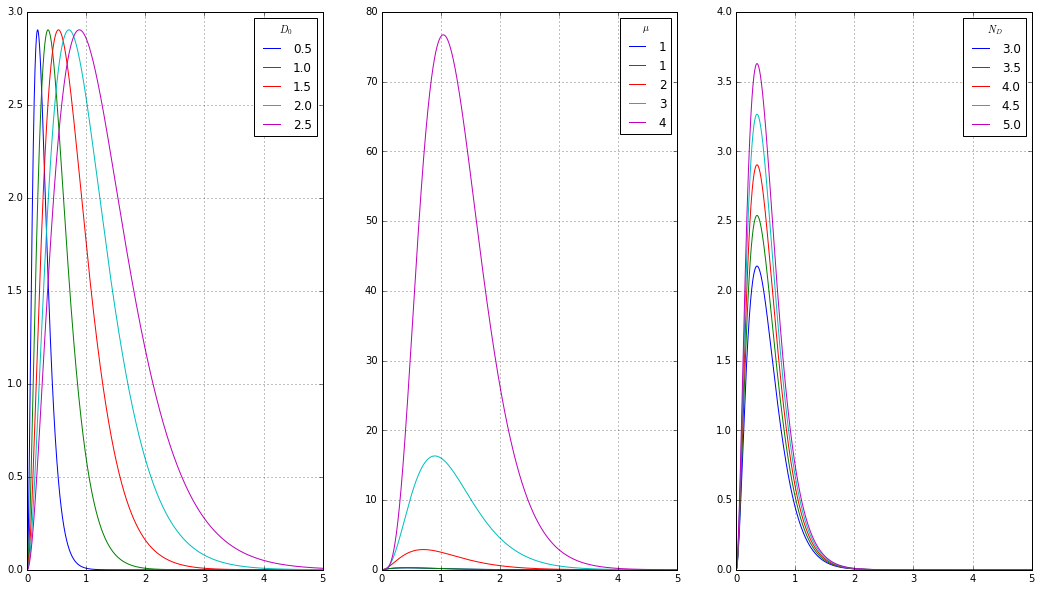

In [14]:
% matplotlib inline
i_my = np.array([1,1,2,3,4])
i_D0 = np.array([0.5,1.,1.5,2.,2.5])
i_Nw = np.array([3,3.5,4,4.5,5])

plt.figure(figsize=(18,10))
for i in range(5):
    plt.subplot(1,3,1)
    N_D = psd(i_D0[i],2,r_drops,4)
    plt.plot(r_drops,N_D, label=str(i_D0[i]))
    plt.grid()
    plt.legend(title=r'$D_0$')

    plt.subplot(1,3,2)
    N_D = psd(2,i_my[i],r_drops,4)
    plt.plot(r_drops,N_D, label=str(i_my[i]))
    plt.grid()
    plt.legend(title=r'$\mu$')


    plt.subplot(1,3,3)
    N_D = psd(1,2,r_drops,i_Nw[i])
    plt.plot(r_drops,N_D, label=str(i_Nw[i]))
    plt.legend(title=r'$N_D$')
    plt.grid()
    


In [ ]:
#### PSD

#????? D_0 ?????? D ?????

D_0 = r_drops
my = 1. # Paper -1,0,1,2,3,4
D = 
N_w = 3# Paper 3-5
N_D = psd(D_0, my, D, N_w)

# Radar reflectivity of radar measurements
--------------------------------------------------------------

$$Z_e (\lambda) = \frac{\lambda^4}{\pi^5 |K_w|^2} \int_{0}^{\infty} N(D) \sigma_b (D,\lambda) dD$$

$D :$ effective prticle diameter

$\sigma_b :$ backscattering cross section

$N(D) :$ particle size distribution

$K_w : $ dielectric parameter, 0.91-0.93 for $\lambda = [0.01- 0.1 m]$ [Doviak and Zrnic 1993]


In [15]:
def Z_e(wav, K_w, N_D, sigma_b):
    """
    Equivalent radar reflectivity of radar measurements
    
    Input : 
        sigma_b : backscatteringcrosssection
        wav : wavelength
        K_w : dielectric parameter
        N_D : normalized gamma particle sice distribution
    Output:
        Z_e : Equivalent radar reflectivity
    
    """
    Ze = (wav**4 /(np.pi**5 * abs(K_w)**2))* np.sum(N_D*sigma_b)
    return Ze

In [88]:
K_w = 0.92
#N_D = 10**3.5 # Paper 1e3.5
#print N_D.shape, sigma_c_band.shape, r_drops.shape
#print (10.*np.log(Z_e(wavel_k_band, K_w, N_D, sigma_k_band)))
#print (10.*np.log(np.sum(N_D*r_drops**6)))
i_my = np.array([1.,1,2,3,4])
i_D0 = np.array([0.5,1.,1.5,2.,2.5])
i_Nw = np.array([3,3.5,4,4.5,5])
psd(i_D0[i],2,r_drops,4)

N_D = psd(i_D0[0], i_my[0], r_drops, i_Nw[0])


Zex = 10.*np.log(Z_e(wavel_c_band, K_w, N_D, sigma_c_band))

print Zex

#plt.plot(r_drops, Zex)

(21.0390721961511+0j)


# Scattering Model
-------------------------------
### scattering characteristics of hydrometeors
- Colmplex dielectric constant (eta: air, ice, water)
- Aspect ration (melting snow 0.6-0.9, snow and ice/hail 0.75)
- Particle orientation (mean canting angle: 0°, SD_rain 0°, SD_snow=20°, SD_ice/hail=60°(1-c_w), cw fractional water content)
- Scattering amplitudes (T_Matrix Cao et al 2008, 2012)


# DSD von Parsivel oder MRR für N(D) bei verschiedenen Temperaturen?


### Aspect ratio (Brandes et al. 2002)
--------------------------

In [ ]:
#r_a = D_horizontla/D_vertical 
r_a = (0.9951 + (0.00251*D) - (0.03644 * D**2.) + (0.00503 * D**3.) - (0.0002492 * D**4) )**-1.

# Microphysical Model
______________________________________


# T-Matrix method
---------------------------

### GPM nur Z_Horizontal.... 

# Dual Frequency Ratio
------------------------------------

In [ ]:
def dfr(Ze_1,Ze_2):
    """
    Dual frequency ration
    
    Input:
        Ze_1 : Equivalent radar reflectivity of wavelength_1
        Ze_2 : Equivalent radar reflectivity of wavelength_2
    Output:
        dfr : Dual frequency ration
    
    """
    
    dfr = 10*np.log(Ze_1) - 10*np.log(Ze_2)
    
    return dfr

# Frequency correction like CAO et al 

In [ ]:
N_w = 10**3.5 # Paper 1e3.5# ?????????????????normalized correction parameter
D_0 = np.arange(0.5,3,0.5)#median volumen diameter
my = 1#shape parameter
D =1# ??????????????effectiv particle radius


K_w = 0.91 # 0.91 bis 0.93 for wavelength between 0.01.0.1m temp indipendent [Doviak and Zrnic 1993]
sigma_b = 1#??????backscatteringcrosssection




In [ ]:
plt.plot(D_0, dfr)

# Frequency correction after R. Warren
--------------------------------------

$$Z(S) = Z(Ku) + \sum_{i=0}^4 a_i[Z(Ku)]^i$$

In [ ]:
Z_S_band = Z_Ku_band + np.sum(a_i * Z_ku_band**i)

# LookUpTable